In [1]:
import sys
import untangle
import socnet as sn
import networkx as nx
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats.stats import pearsonr
from scipy.optimize import minimize
from scipy import stats

In [2]:
tags = untangle.parse("./data/Tags.xml")
postHist = untangle.parse("./data/PostHistory.xml")
posts = untangle.parse("./data/Posts.xml")
users = untangle.parse("./data/Users.xml")
votes = untangle.parse("./data/Votes.xml")

In [3]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 0.5
sn.edge_color = (192, 192, 192)

sn.node_label_position = 'top center'

In [4]:
def normalize_list(l):
    dmin = min(l)
    dmax = max(l)
    print(dmin, " , ", dmax)
    print(1/dmax)
    result = []
    for i in l:
        result.append((i - dmin) / (dmax - dmin))
    
    
    return result

In [5]:
#{userid : [postid1, postid2]} - userposts
#{postid : parentpost} - parent
#{postid : user} - postuser
#{userid : displayname} - username
#{userid : reputation} - userrep
#{normalizedid : userid} normalizedid = {}
#[(userid, userid)] - edges

userposts = {}
parent = {}
postuser = {}
username = {}
userrep = {}
normalizedid = {}
edges = []

fakes = {"user306": "9001", "user2508039": "9002", "Shireen": "2047"}
fakerep = [0,0,66]
#There are 3 users that appears names on posts references, but are not mentioned anywhere else  
#we added them to a unique dictionary so they would not colapse the entire graph
#Shireen is actually a working user entry, but it seens the this user changed ts nickname so maybe thats why it also shows its
#old name in the post. Another postt she appears does not have the OwnerDisplayName field

counter = 0
for i in users.users.row:
    normalizedid[counter] = i["Id"]
    userposts[i['Id']] = []
    username[i['Id']] = str(i['DisplayName'].encode("utf-8", 'xmlcharrefreplace')).strip("b'").strip("'").strip("\"")
    userrep[i['Id']] = int(i["Reputation"])
    counter +=1
freezeCounter = counter
for i in fakes.items():
    userposts[i[1]] = []
    username[i[1]] = i[0]
    username[i[1]] = i[0]
    userrep[i[1]] = fakerep[counter - freezeCounter]
    normalizedid[counter] = i[1]
    counter +=1 

for i in posts.posts.row:
    
    
    current_parent = None
    if i["PostTypeId"] == "2":
        current_parent = i["ParentId"]
    parent[i['Id']] = current_parent
    
    #Gerenciate (engrish pls) cases when there is a wierd name instead of id, as represented in <Dict>fakes
    if(i["OwnerUserId"]) == None:
        postuser[i["Id"]] = fakes[i["OwnerDisplayName"]]
        userposts[fakes[i["OwnerDisplayName"]]].append(i["Id"])
        
    else:
        postuser[i["Id"]] = i["OwnerUserId"]
        userposts[i["OwnerUserId"]].append(i["Id"])
    


In [6]:
#write gml

file = open("quantum_V01.gml", "w")
file.write('graph [\n')
file.write('  directed 1\n')

for i in userposts.keys():
    #print(username[i])
    file.write('  node [\n')
    file.write('    id {}\n'.format(i))
    file.write('    label "' + username[i] + '"\n')
    file.write('  ]\n')
    

edges = []
for i in userposts.keys():
    for post in userposts[i]:
        question = parent[post]
        if(question != None):
            if not (i,postuser[question]) in edges:
                edges.append((i,postuser[question]))
                #print(i, " - ", postuser[question])
                file.write('  edge [\n')
                file.write('    source {}\n'.format(i))
                file.write('    target {}\n'.format(postuser[question]))
                file.write('  ]\n')
            else:
                print("Avoided crisis  -  ",i, " - ", postuser[question])
file.write(']')
file.close()

Avoided crisis  -   18  -  27
Avoided crisis  -   23  -  26
Avoided crisis  -   23  -  26
Avoided crisis  -   23  -  55
Avoided crisis  -   23  -  253
Avoided crisis  -   23  -  26
Avoided crisis  -   23  -  2645
Avoided crisis  -   26  -  261
Avoided crisis  -   26  -  26
Avoided crisis  -   26  -  91
Avoided crisis  -   26  -  609
Avoided crisis  -   26  -  26
Avoided crisis  -   26  -  2559
Avoided crisis  -   26  -  2559
Avoided crisis  -   26  -  2559
Avoided crisis  -   26  -  2559
Avoided crisis  -   26  -  26
Avoided crisis  -   26  -  2529
Avoided crisis  -   26  -  3035
Avoided crisis  -   54  -  1658
Avoided crisis  -   54  -  409
Avoided crisis  -   54  -  2371
Avoided crisis  -   55  -  261
Avoided crisis  -   55  -  104
Avoided crisis  -   55  -  580
Avoided crisis  -   55  -  1931
Avoided crisis  -   55  -  2293
Avoided crisis  -   55  -  2645
Avoided crisis  -   91  -  253
Avoided crisis  -   91  -  2645
Avoided crisis  -   104  -  91
Avoided crisis  -   119  -  2100
Av

In [7]:
nodes_raw = sn.load_graph('quantum_V01.gml', has_pos=False)
for i in range(len(edges)):
    edges[i] =  (int(edges[i][0]),int(edges[i][1]))
    
nodes = nx.edge_subgraph(nodes_raw, edges)

sn.show_graph(nodes, nlab=False)


C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:59: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:187: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:188: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:189: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:190: RuntimeWarning:

invalid value encountered in double_scalars



In [8]:
sn.show_graph(nodes, nlab=True)

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:59: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:187: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:188: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:189: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Jean Low\Documents\GitHub\StackERedes\socnet.py:190: RuntimeWarning:

invalid value encountered in double_scalars



In [10]:
#provar que eh um small word
#nx.average_shortest_path_length(nodes.to_undirected())
#---grafo nao eh conectado, portanto nao eh um small world, como imaginado no inicio, eh um grafo que pode ser separado sem
#quebras de arestas

In [11]:
#listing how many questions were asked/answered by a certain user
# NOT USED
(Counter(elem[0] for elem in edges))

Counter({7: 1,
         11: 1,
         13: 3,
         15: 9,
         18: 5,
         23: 20,
         24: 4,
         26: 36,
         27: 2,
         29: 1,
         32: 4,
         35: 1,
         39: 1,
         54: 13,
         55: 32,
         67: 1,
         70: 2,
         72: 2,
         82: 1,
         86: 2,
         91: 14,
         99: 2,
         104: 9,
         119: 26,
         124: 33,
         127: 2,
         138: 2,
         144: 3,
         162: 2,
         171: 1,
         176: 1,
         197: 4,
         236: 2,
         238: 4,
         253: 10,
         263: 6,
         274: 4,
         278: 22,
         299: 1,
         302: 3,
         356: 3,
         362: 2,
         391: 5,
         407: 1,
         409: 57,
         410: 3,
         419: 4,
         422: 1,
         429: 3,
         434: 11,
         483: 4,
         484: 1,
         491: 13,
         505: 1,
         506: 1,
         522: 1,
         534: 3,
         551: 4,
         563: 2,
        

In [12]:
#sorting user id by reputation
# Visual aid on confirming behaviour
userrepSort = sorted(userrep.items(), key=lambda kv: kv[1], reverse=True)
userrepSort

[('1837', 7477),
 ('26', 5220),
 ('409', 5102),
 ('124', 3993),
 ('2293', 3655),
 ('55', 2888),
 ('23', 2081),
 ('119', 2016),
 ('91', 1878),
 ('1847', 1584),
 ('278', 1460),
 ('1039', 1444),
 ('253', 1328),
 ('54', 1299),
 ('15', 1145),
 ('1386', 1119),
 ('104', 1092),
 ('2645', 955),
 ('1764', 854),
 ('2559', 759),
 ('7', 758),
 ('18', 750),
 ('32', 724),
 ('391', 717),
 ('1234', 715),
 ('144', 705),
 ('138', 675),
 ('238', 663),
 ('2371', 663),
 ('2105', 612),
 ('434', 595),
 ('11', 573),
 ('236', 570),
 ('491', 564),
 ('1974', 537),
 ('3056', 520),
 ('2529', 488),
 ('2015', 482),
 ('4127', 480),
 ('162', 473),
 ('2503', 473),
 ('72', 464),
 ('362', 442),
 ('2100', 442),
 ('13', 440),
 ('2663', 431),
 ('99', 422),
 ('2648', 421),
 ('429', 410),
 ('27', 394),
 ('1955', 393),
 ('356', 391),
 ('551', 390),
 ('58', 388),
 ('40', 387),
 ('274', 386),
 ('1905', 384),
 ('2927', 381),
 ('39', 377),
 ('197', 376),
 ('2879', 366),
 ('1658', 361),
 ('769', 357),
 ('1931', 355),
 ('4211', 355),

In [13]:
#betweenness for nodes with edges

bc = nx.betweenness_centrality(nodes)

In [14]:
#closeness for nodes with edges
#Not used

clos = nx.closeness_centrality(nodes)
closDict = {}
        
sortDictC = sorted([(v,k) for k,v in clos.items()], reverse = True)
sortDictC

[(0.15270905870136214, 2645),
 (0.14651793789568887, 2559),
 (0.1375294042850785, 1931),
 (0.12663678038649545, 253),
 (0.12663678038649545, 55),
 (0.12561551602853982, 2293),
 (0.12461059190031153, 26),
 (0.12362161894872174, 391),
 (0.12313299594892442, 91),
 (0.12216724696108973, 1905),
 (0.11981787682722261, 1955),
 (0.11555933163409797, 1348),
 (0.11514063840353966, 138),
 (0.1149544205722431, 2371),
 (0.11328235627301048, 278),
 (0.11318439807109631, 2015),
 (0.11279810319713353, 1254),
 (0.11269083758644308, 3021),
 (0.11246443312302484, 2927),
 (0.11241443617945619, 3088),
 (0.11214953271028037, 429),
 (0.1120598848024384, 144),
 (0.11203337029410211, 90),
 (0.11165823646981318, 409),
 (0.11125945705384957, 1386),
 (0.11083784226922445, 58),
 (0.11042311661506707, 769),
 (0.11024222773221437, 1874),
 (0.10939838977222154, 11),
 (0.1093847352024922, 27),
 (0.10883156232663337, 1185),
 (0.10876246628614439, 1346),
 (0.10742292405199269, 1847),
 (0.10699938114268331, 261),
 (0.105

In [15]:
#Page rank and sort for aid
pr = nx.pagerank(nodes)
prNamed = {}
    
prNamedSorted = sorted(pr.items(), key=lambda kv: kv[1], reverse=True)
prNamedSorted

[(1346, 0.02926891349161315),
 (2645, 0.021687883787350447),
 (253, 0.02052402629635363),
 (2782, 0.018421194053108533),
 (2559, 0.0177605932845025),
 (27, 0.013815774523395533),
 (26, 0.012945196535365631),
 (2047, 0.012266005011241457),
 (2794, 0.011694333394708033),
 (55, 0.011601173650941309),
 (1905, 0.011059554430073112),
 (506, 0.011009527151459739),
 (2592, 0.011009527151459739),
 (1931, 0.010646178880198304),
 (769, 0.010123158786021038),
 (99, 0.009587213876959558),
 (1955, 0.009585841266630264),
 (11, 0.009418075054094581),
 (91, 0.009183720071682697),
 (2293, 0.009177265889328622),
 (2100, 0.008896784468144514),
 (1837, 0.00810382027317538),
 (3088, 0.007973353865526908),
 (4164, 0.007898642064658807),
 (71, 0.007458111932122567),
 (40, 0.00717549230135534),
 (391, 0.007097215625850389),
 (4127, 0.0068143792248614625),
 (2529, 0.006718650715440008),
 (144, 0.0067126822143698224),
 (1386, 0.0065222516071733105),
 (2927, 0.006040068555148989),
 (1847, 0.005909368174099682),
 

In [33]:
#Linking rep and btweenness
bclist = []
replist = []
idlist = []


for i in bc.items():
    #print("id = ",  )
    bclist.append(i[1])
    idlist.append(i[0])
    replist.append(userrep[str(i[0])])


    
#Confirming behaviour
for i in range(len(idlist)):
    print(idlist[i]," --> rep = ", replist[i], " | bc = ", bclist[i])
    pass

2054  --> rep =  33  | bc =  0.0
7  --> rep =  758  | bc =  8.35991198140731e-05
1034  --> rep =  281  | bc =  0.0
11  --> rep =  573  | bc =  0.00023445612668743508
2060  --> rep =  88  | bc =  0.0
13  --> rep =  440  | bc =  0.002643363499817939
2061  --> rep =  138  | bc =  0.0
1039  --> rep =  1444  | bc =  0.01737103744624187
15  --> rep =  1145  | bc =  0.0
3088  --> rep =  28  | bc =  0.0
18  --> rep =  750  | bc =  0.001194833852544133
14  --> rep =  149  | bc =  0.0
1044  --> rep =  148  | bc =  0.0
23  --> rep =  2081  | bc =  0.001681026090342679
24  --> rep =  286  | bc =  0.0
3097  --> rep =  149  | bc =  0.0
26  --> rep =  5220  | bc =  0.05307839567623448
27  --> rep =  394  | bc =  0.002044392523364486
4120  --> rep =  41  | bc =  0.0
29  --> rep =  190  | bc =  0.0
2074  --> rep =  36  | bc =  0.0
4127  --> rep =  480  | bc =  0.014092105270551526
2080  --> rep =  138  | bc =  0.0
31  --> rep =  250  | bc =  0.0
32  --> rep =  724  | bc =  0.0
35  --> rep =  353  | bc 

In [34]:
#Ttest betweenness and rep with all nodes possible
normalbc = normalize_list(bclist)
nreplist = normalize_list(replist)

stats.ttest_ind(nreplist,normalbc)

0.0  ,  0.06984809807166695
14.316782097258539
0  ,  7477
0.00013374348000534973


Ttest_indResult(statistic=2.288188772264547, pvalue=0.022450668754978774)

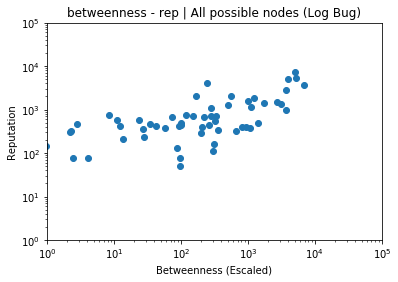

In [74]:

plt.axis([1,100000,1,100000])
ax = plt.gca()
ax.scatter([x * 100000 for x in bclist],replist) #Scalling small values seens more trustworth than my normalize function.
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("betweenness - rep | All possible nodes (Log Bug)")
plt.xlabel("Betweenness (Escaled)")
plt.ylabel("Reputation")
plt.show()

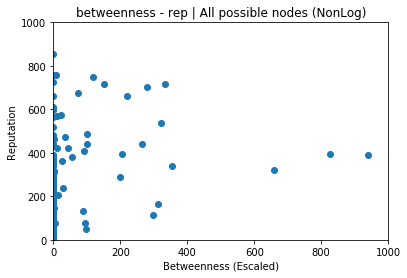

In [76]:
#There is a bug on pyplot where some data that includes zeros, when scalled in Log scale bugs the graph plot
#Using an linear graph just for showing the amount nodes with betweenness = zero (all at the left wall).
plt.axis([0,1000,0,1000])
ax = plt.gca()
ax.scatter([x * 100000 for x in bclist],replist) 
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("betweenness - rep | All possible nodes (NonLog)")
plt.xlabel("Betweenness (Escaled)")
plt.ylabel("Reputation")
plt.show()

In [77]:
#Removing nodes with betweenness == zero
btwnodes = []
repforbtwnodes = []
for i in bc.items():
    if(i[1] > 0):
        btwnodes.append(i[1])
        repforbtwnodes.append(userrep[str(i[0])])

for i in range(len(btwnodes)):
    print(btwnodes[i], "-",repforbtwnodes[i])

8.35991198140731e-05 - 758
0.00023445612668743508 - 573
0.002643363499817939 - 440
0.01737103744624187 - 1444
0.001194833852544133 - 750
0.001681026090342679 - 2081
0.05307839567623448 - 5220
0.002044392523364486 - 394
0.014092105270551526 - 480
0.0010027258566978193 - 442
0.03748430764566865 - 2888
0.005051389015320088 - 1299
2.271547248182762e-05 - 316
2.7907580477673936e-05 - 464
0.006588277214737496 - 323
0.012415225596811472 - 1878
0.00012169003115264798 - 422
0.0028543936809123727 - 1092
0.00568049065420561 - 2016
0.002480090246591415 - 3993
0.0007309823591949761 - 675
0.0028068376381752552 - 705
0.0003399208203530633 - 473
0.0015172853928695049 - 715
9.735202492211838e-06 - 148
0.00011091177125055631 - 570
0.06984809807166695 - 3655
0.03071408158732925 - 1328
0.027312783662447774 - 1460
0.0022009957067638136 - 663
0.002972365932354252 - 113
0.0001366173416407062 - 206
0.011175514570666439 - 1119
0.003347255623832727 - 717
0.040178468959864974 - 5102
0.0009208265341442911 - 410
0

In [78]:
#TTest with only nodes where betweenness > 0
x = normalize_list(btwnodes)
y = normalize_list(repforbtwnodes)

stats.ttest_rel([x * 100000 for x in btwnodes],[y * 1 for y in repforbtwnodes])

#for i in range(len(btwnodes)):
 #   print(x[i], " | ",y[i])

9.735202492211838e-06  ,  0.06984809807166695
14.316782097258539
49  ,  7477
0.00013374348000534973


Ttest_relResult(statistic=-1.3074242820111779, pvalue=0.19641124753237918)

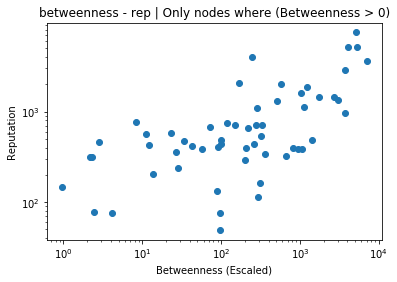

In [82]:
#Basicaly the same plot, becouse my log scaled first plot did not render the nodes with no betweenness
#plt.axis([0,1000,0,1000])
ax = plt.gca()
ax.scatter([x * 100000 for x in btwnodes],repforbtwnodes)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title("betweenness - rep | Only nodes where (Betweenness > 0)")
plt.xlabel("Betweenness (Escaled)")
plt.ylabel("Reputation")
plt.show()

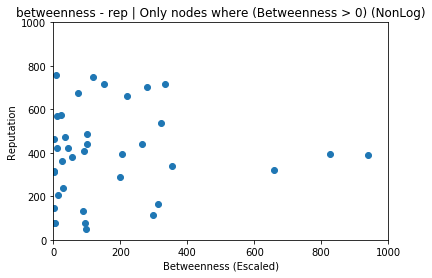

In [83]:
#See how there are none of those nodes clustered at the left wall now
plt.axis([0,1000,0,1000])
ax = plt.gca()
ax.scatter([x * 100000 for x in btwnodes],repforbtwnodes) 
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title("betweenness - rep | Only nodes where (Betweenness > 0) (NonLog)")
plt.xlabel("Betweenness (Escaled)")
plt.ylabel("Reputation")
plt.show()